**Tasks for Part 6 - Project 1 Final**

1) Your first task is to build a linear regression model to predict sales.

-Build a linear regression model.

-Evaluate the performance of your model based on r^2.

-Evaluate the performance of your model based on rmse.

2) Your second task is to build a regression tree model to predict sales.

-Build a simple regression tree model.

-Compare the performance of your model based on r^2.

-Compare the performance of your model based on rmse.  

3) You now have tried 2 different models on your data set. You need to determine which model to implement.

-Overall, which model do you recommend?

-Justify your recommendation.

4) To finalize this project, complete a README in your GitHub repository including:

-An overview of the project

-2 relevant insights from the data (supported with reporting quality visualizations)

-Summary of the model and its evaluation metrics
Final recommendations.

In [813]:
# Import Libraries, Mount your drive and load in your data set
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import set_config
set_config(display='diagram')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [814]:
# Load Dataframe
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [815]:
# Check the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [816]:
# Check and Clean Data

# Check for Duplicates
df.duplicated().sum()

0

In [817]:
# Check for Missing Values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [818]:
# Find and fix any inconsistent categories of data 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [819]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [820]:
# Drop Unwanted Columns
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [821]:
# Identify each feature as numerical, ordinal, or nominal
display(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 3982 to 2732
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           1413 non-null   float64
 1   Item_Fat_Content      1704 non-null   object 
 2   Item_Visibility       1704 non-null   float64
 3   Item_Type             1704 non-null   object 
 4   Item_MRP              1704 non-null   float64
 5   Outlet_Size           1241 non-null   float64
 6   Outlet_Location_Type  1704 non-null   int64  
 7   Outlet_Type           1704 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 119.8+ KB


None

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
3982,10.800,Low Fat,0.082550,Dairy,193.7504,0.0,0,Supermarket Type1
8364,9.000,Low Fat,0.086088,Snack Foods,168.7816,1.0,0,Supermarket Type1
5043,NaN,Low Fat,0.000000,Soft Drinks,89.4146,1.0,2,Supermarket Type3
5104,10.195,Regular,0.017659,Starchy Foods,240.1538,1.0,0,Supermarket Type1
8248,9.800,Regular,0.045359,Baking Goods,36.1874,NaN,1,Supermarket Type1


Data Types:

Numeric: Item_Weight, Item_Visibility, Item_MRP, 

Nominal: Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type

Ordinal: Outlet_size, Outlet_Location_Type

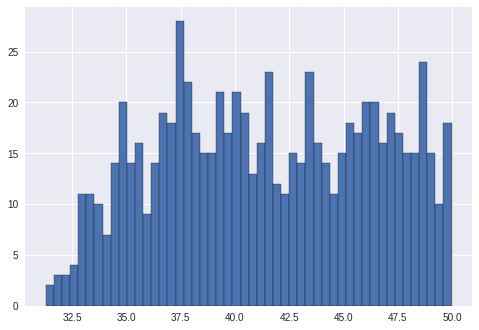

In [822]:
# Histogram to view the distributions of various features in your dataset.
# Histogram of Item MRP
plt.style.use('seaborn')
price_filter = df.loc[:, 'Item_MRP'] <= 50
df.loc[price_filter, 'Item_MRP'].hist(bins = 50,
                                   edgecolor='black')

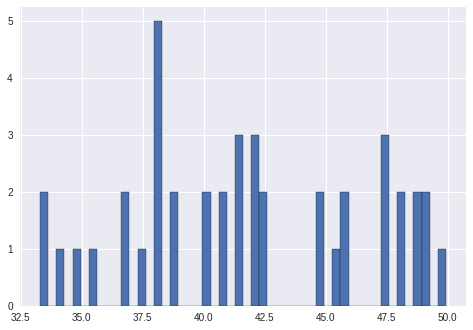

In [823]:
# Histogram of Item Outlet Sales
plt.style.use('seaborn')
price_filter = df.loc[:, 'Item_Outlet_Sales'] <= 50
df.loc[price_filter, 'Item_Outlet_Sales'].hist(bins = 50,
                                   edgecolor='black')

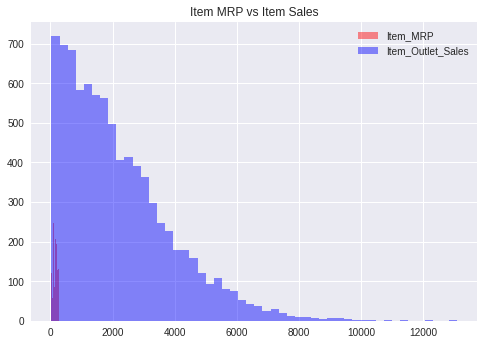

In [824]:
# Histogram of Item MRP vs Item Sales
plt.hist(df['Item_MRP'], bins=50, alpha=0.45, color='red')
plt.hist(df['Item_Outlet_Sales'], bins=50, alpha=0.45, color='blue')
plt.title("Item MRP vs Item Sales")
plt.legend(['Item_MRP', 
            'Item_Outlet_Sales'])
plt.show()

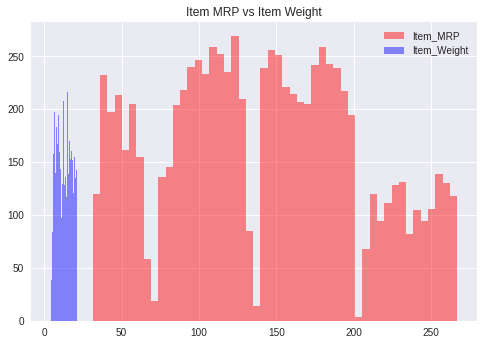

In [825]:
#Histogram of Item MRP vs Item Weight
plt.hist(df['Item_MRP'], bins=50, alpha=0.45, color='red')
plt.hist(df['Item_Weight'], bins=50, alpha=0.45, color='blue')
plt.title("Item MRP vs Item Weight")
plt.legend(['Item_MRP', 
            'Item_Weight'])
plt.show()

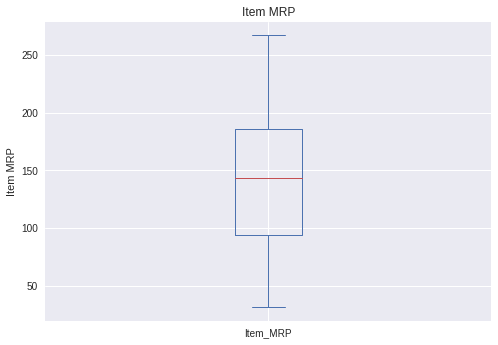

In [826]:
# Boxplot to view statistical summaries of various features in your dataset.
# Boxplot of Item MRP, this provides a clean boxplot with not many outliers
df['Item_MRP'].plot(kind='box')
plt.title('Item MRP')
plt.ylabel('Item MRP')
plt.show()

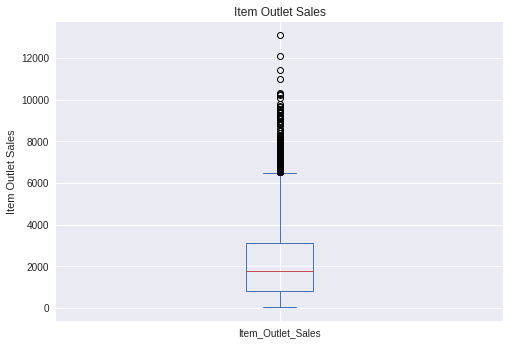

In [827]:
# Boxplot of Item Outlet Sales, unfortunately there are to many outliers for this to be useful, this is due to extreme contrast of some sales compared to the median
df['Item_Outlet_Sales'].plot(kind='box')
plt.title('Item Outlet Sales')
plt.ylabel('Item Outlet Sales')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


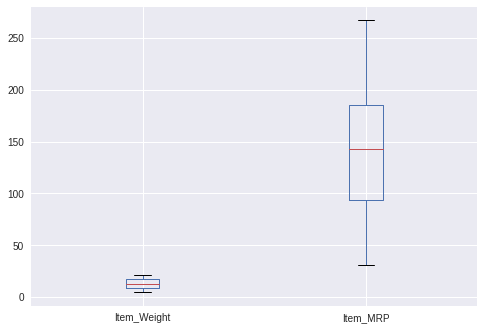

In [828]:
# As seen below, since the discrepancy of values a boxplot may not be the best way to compare this data
df.boxplot(column=['Item_Weight', 'Item_MRP'])

In [829]:
# Heatmap of the correlation between features.
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


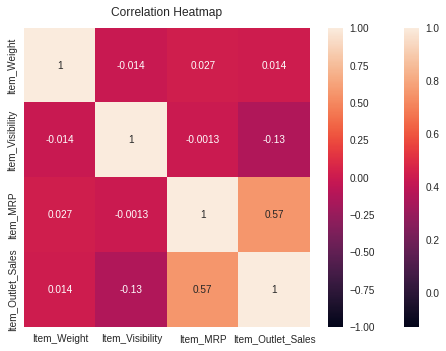

In [830]:
# An example of a square correlation heatmap comparing the data
sns.heatmap(df.corr());
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


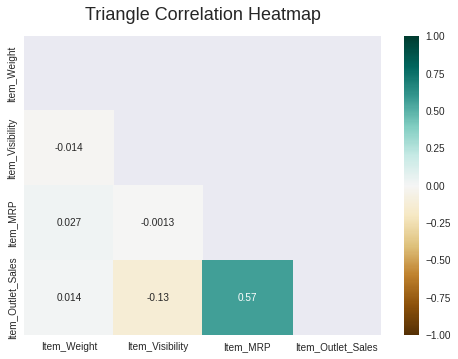

In [831]:
# An example of a triangle correlation heatmap comparing the data
# Using this method makes the limited data easier to view as there is not any duplicates
np.triu(np.ones_like(df.corr()))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Text(0.5, 1.0, 'Outlet Type vs Outlet Sales')

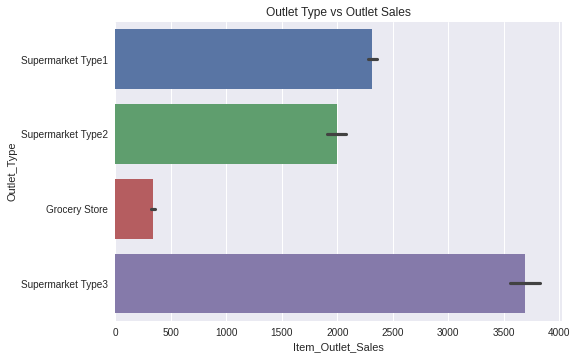

In [832]:
# Barplot of Outlet Type vs Outlet Sales
sns.barplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales');
plt.title('Outlet Type vs Outlet Sales')

In [833]:
# Code the Ordinal data
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [834]:
# Ordinal Encoding 'Outlet_size'
df_outsize = {'High':2, 'Medium':1,'Small':0}
df['Outlet_Size'].replace(df_outsize, inplace=True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [835]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [836]:
# Ordinal Encoding 'Outlet_Location_Type'
df_outtype = {'Tier 3':2, 'Tier 2':1, 'Tier 1':0}
df['Outlet_Location_Type'].replace(df_outtype, inplace=True)
df['Outlet_Location_Type']

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [877]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = df.index
te_oh.index = df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([df, tr_oh], axis=1)
te_fe = pd.concat([df, te_oh], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [878]:
#Machine Learning models
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [879]:
#Linear Regression model
LR = LinearRegression(normalize=True)

In [880]:
#fit
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


ValueError: ignored

In [872]:
#predict
y_predict = LR.predict(X_test)

NotFittedError: ignored

In [ ]:
#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

In [ ]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")    

In [ ]:
#Random forest model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)

In [ ]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")     

In [ ]:
#Lasso Regression model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

In [ ]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")

In [ ]:
#Decision Tree Model
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
#fit
DT.fit(X_train, y_train)
# make predictions for test data
y_pred = DT.predict(X_test)
# score variables
DT_MAE = round(MAE(y_test, y_predict),2)
DT_MSE = round(MSE(y_test, y_predict),2)
DT_R_2 = round(R2(y_test, y_predict),4)
DT_CS  = round(CVS(DT, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {DT_MAE}\n")
print(f" Mean Squared Error: {DT_MSE}\n")
print(f" R^2 Score: {DT_R_2}\n")
cross_val(DT, DecisionTreeRegressor(max_depth=15, min_samples_leaf=100),X,y,5)

In [ ]:
#Ridge Regression Model
RR = Ridge(alpha=0.05,normalize=True)
#fit
RR.fit(X_train, y_train)
# make predictions for test data
y_pred = RR.predict(X_test)
# score variables
RR_MAE = round(MAE(y_test, y_predict),2)
RR_MSE = round(MSE(y_test, y_predict),2)
RR_R_2 = round(R2(y_test, y_predict),4)
RR_CS  = round(CVS(RR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RR_MAE}\n")
print(f" Mean Squared Error: {RR_MSE}\n")
print(f" R^2 Score: {RR_R_2}\n")
cross_val(RR, Ridge(alpha=0.05,normalize=True),X,y,5)

In [ ]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,DT_MAE,RR_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,DT_MSE,RR_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2,DT_R_2,RR_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS,DT_CS,RR_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regression","Lasso Regression","Decision Tree","Ridge Regression"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)